# Лабораторная работа 4
## Доброхотов Виталий 381806-3

Дано:
\begin{align*}
  &  Q = 4x^2 + 2xy + y^2 +2  \\
  &  g1 = (x+1)^2+(y+1)^2-9  \\
  &  g2 = 0.5x + y + 0.5  \\
  &  g3 = -2x + y + 1  \\
\end{align*}
Найти точку, которая будет удовлетворять ККТ.


### Отображение функции

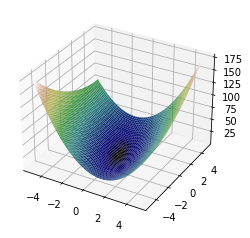

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def funcQ(x, y):
    return 4*x**2 + 2*x*y+y**2+2

# border x y
xLeftBorder = -5
xRightBorder = 5
yLeftBorder = -5
yRightBorder = 5

x = np.arange(xLeftBorder, xRightBorder, 0.01)
y = np.arange(yLeftBorder, yRightBorder, 0.01)

X,Y = np.meshgrid(x, y)
Z = funcQ(X,Y)


ax = plt.axes(projection = "3d")
ax.plot_surface(X, Y, Z, cmap = cm.gist_earth)

### Линии уровня

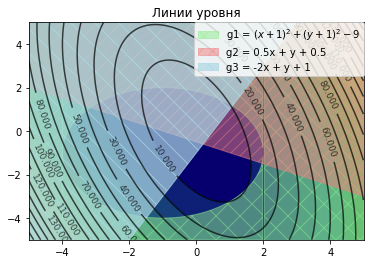

In [26]:
level = 17
fig, ax = plt.subplots()
plt.title("Линии уровня")
plt.xlim(xLeftBorder, xRightBorder)
plt.ylim(yLeftBorder,yRightBorder)

specialXforSqrt = np.arange(-4, 2, 0.01)

ax.contourf(X, Y, Z,levels = level, cmap = cm.gist_earth)

ax.fill_between(x, yLeftBorder, yRightBorder,where = ((x >  2)) , color = 'lightgreen',hatch='X', alpha  = 0.5)
ax.fill_between(x, yLeftBorder, yRightBorder,where = ((x < -4)) , color = 'lightgreen',hatch='X', alpha  = 0.5)
ax.fill_between(specialXforSqrt,-np.sqrt(9-(specialXforSqrt+1)**2)-1, yLeftBorder, color = 'lightgreen',hatch='X', alpha = 0.5)
ax.fill_between(specialXforSqrt, np.sqrt(9-(specialXforSqrt+1)**2)-1, yRightBorder, color = 'lightgreen',hatch='X', alpha = 0.5, label = r'g1 = $(x+1)^2+(y+1)^2-9$')
ax.fill_between(x, -0.5*x -0.5, yRightBorder, color = "lightcoral", hatch = "//", alpha = 0.5, label = "g2 = 0.5x + y + 0.5")
ax.fill_between(x, 2*x -1 , yRightBorder, color = 'lightblue', hatch="\\", alpha = 0.7, label = "g3 = -2x + y + 1")
cs = ax.contour(X, Y, Z,levels = level, colors = "black", alpha =0.7)
ax.clabel(cs,inline = True, colors = "black", fontsize = 9)
plt.legend(bbox_to_anchor=(1, 1), loc="best", borderaxespad=0.)

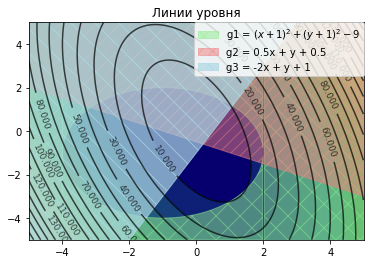

In [27]:
level = 17
fig, ax = plt.subplots()
plt.title("Линии уровня")
plt.xlim(xLeftBorder, xRightBorder)
plt.ylim(yLeftBorder,yRightBorder)

specialXforSqrt = np.arange(-4, 2, 0.01)

ax.contourf(X, Y, Z,levels = level, cmap = cm.gist_earth)
ax.fill_between(x, yLeftBorder, yRightBorder,where = ((x >  2)) , color = 'lightgreen',hatch='X', alpha  = 0.5)
ax.fill_between(x, yLeftBorder, yRightBorder,where = ((x < -4)) , color = 'lightgreen',hatch='X', alpha  = 0.5)
ax.fill_between(specialXforSqrt,-np.sqrt(9-(specialXforSqrt+1)**2)-1, yLeftBorder, color = 'lightgreen',hatch='X', alpha = 0.5)
ax.fill_between(specialXforSqrt, np.sqrt(9-(specialXforSqrt+1)**2)-1, yRightBorder, color = 'lightgreen',hatch='X', alpha = 0.5, label = r'g1 = $(x+1)^2+(y+1)^2-9$')
ax.fill_between(x, -0.5*x -0.5, yRightBorder, color = "lightcoral", hatch = "//", alpha = 0.5, label = "g2 = 0.5x + y + 0.5")
ax.fill_between(x, 2*x -1 , yRightBorder, color = 'lightblue', hatch="\\", alpha = 0.7, label = "g3 = -2x + y + 1")
cs = ax.contour(X, Y, Z,levels = level, colors = "black", alpha =0.7)
ax.clabel(cs,inline = True, colors = "black", fontsize = 9)
plt.legend(bbox_to_anchor=(1, 1), loc="best", borderaxespad=0.)


### Первый этап 
Так как функция $Q$ - выпукла и регулярна, а $g1$- выпукло, $g2, g3$ - афинны, то $\lambda_0=1$ 

Тогда функция Лагранжа примет вид:
$$ L(x,y,1, \mu_1, \mu_2, \mu_3) = 4x^2 + 2x*y+y^2+2+\mu_1*((x+1)^2+(y+1)^2-9)+\mu_2*(0.5*x + y + 0.5) + \mu_3*(-2x + y + 1)$$

Попробуем сначала решить систему линейных уравнений с $\mu_1 =0, \mu_2 =0, \mu_3 =0$

In [28]:
from sympy import symbols,diff, nsolve, Matrix, Eq
from IPython.display import display

x_, y_ = symbols("x y")
mu1, mu2, mu3 = symbols("mu1 mu2 mu3")
funcQ = 4*x_**2 + 2*x_*y_+y_**2+2
g1 = (x_+1)**2+(y_+1)**2-9
g2 = 0.5*x_ + y_ + 0.5
g3 = -2*x_ + y_ + 1

lagrange = funcQ
display(lagrange)
dl_dx = diff(lagrange, x_)
dl_dy = diff(lagrange, y_)
res = nsolve((dl_dx, dl_dy), (x_,y_), (0,0))
m = Matrix([Eq(dl_dx,0), Eq(dl_dy,0)])
display(m)



4*x**2 + 2*x*y + y**2 + 2

Matrix([
[Eq(8*x + 2*y, 0)],
[Eq(2*x + 2*y, 0)]])

Решаем данную систему

In [29]:
resX, resY = nsolve((dl_dx, dl_dy), (x_,y_), (0,0))
display(Eq(x_,resX), Eq(y_, resY))

Eq(x, 0)

Eq(y, 0)

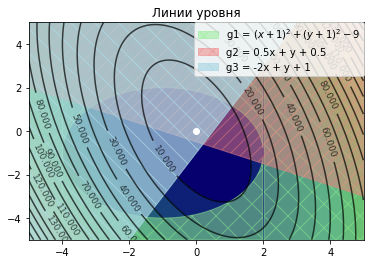

In [30]:
level = 17
fig, ax = plt.subplots()
plt.title("Линии уровня")
plt.xlim(xLeftBorder, xRightBorder)
plt.ylim(yLeftBorder,yRightBorder)

specialXforSqrt = np.arange(-4, 2, 0.01)

ax.contourf(X, Y, Z,levels = level, cmap = cm.gist_earth)
ax.fill_between(x, yLeftBorder, yRightBorder,where = ((x >  2)) , color = 'lightgreen',hatch='X', alpha  = 0.5)
ax.fill_between(x, yLeftBorder, yRightBorder,where = ((x < -4)) , color = 'lightgreen',hatch='X', alpha  = 0.5)
ax.fill_between(specialXforSqrt,-np.sqrt(9-(specialXforSqrt+1)**2)-1, yLeftBorder, color = 'lightgreen',hatch='X', alpha = 0.5)
ax.fill_between(specialXforSqrt, np.sqrt(9-(specialXforSqrt+1)**2)-1, yRightBorder, color = 'lightgreen',hatch='X', alpha = 0.5, label = r'g1 = $(x+1)^2+(y+1)^2-9$')
ax.fill_between(x, -0.5*x -0.5, yRightBorder, color = "lightcoral", hatch = "//", alpha = 0.5, label = "g2 = 0.5x + y + 0.5")
ax.fill_between(x, 2*x -1 , yRightBorder, color = 'lightblue', hatch="\\", alpha = 0.7, label = "g3 = -2x + y + 1")
cs = ax.contour(X, Y, Z,levels = level, colors = "black", alpha =0.7)
ax.clabel(cs,inline = True, colors = "black", fontsize = 9)
plt.legend(bbox_to_anchor=(1, 1), loc="best", borderaxespad=0.)
ax.scatter(resX, resY, color = 'white')

Как видно из рисунка, найденная точка нарушает g2, g3. Сделаем эти ограничения активными, и решим новую систему

In [31]:
x_, y_ = symbols("x y")
mu1, mu2, mu3 = symbols("mu1 mu2 mu3")
lagrange = funcQ + mu2*g2+ mu3*g3
display(lagrange)
dl_dx = diff(lagrange, x_)
dl_dy = diff(lagrange, y_)
dl_mu2 = diff(lagrange, mu2)
dl_mu3 = diff(lagrange, mu3)
display(Matrix([Eq(dl_dx, 0), Eq(dl_dy,0),  Eq(dl_mu2,0), Eq(dl_mu3,0)]))


mu2*(0.5*x + y + 0.5) + mu3*(-2*x + y + 1) + 4*x**2 + 2*x*y + y**2 + 2

Matrix([
[Eq(0.5*mu2 - 2*mu3 + 8*x + 2*y, 0)],
[      Eq(mu2 + mu3 + 2*x + 2*y, 0)],
[            Eq(0.5*x + y + 0.5, 0)],
[               Eq(-2*x + y + 1, 0)]])

In [34]:
from sympy import Matrix, Eq
res = nsolve((dl_dx, dl_dy, dl_mu2, dl_mu3), (x_,y_, mu2, mu3), (0,0,0,0))
eq1 = Eq(x_,res[0])
eq2 = Eq(y_,res[1])
eq3 = Eq(mu2,res[2])
eq4 = Eq(mu3,res[3])
display(eq1,eq2, eq3,eq4)


Eq(x, 0.2)

Eq(y, -0.6)

Eq(mu2, 0.48)

Eq(mu3, 0.32)

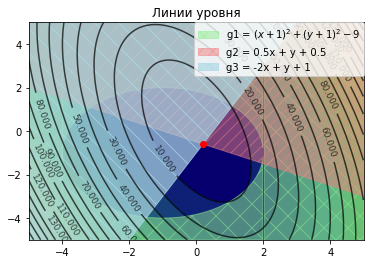

In [33]:
level = 17
fig, ax = plt.subplots()
plt.title("Линии уровня")
plt.xlim(xLeftBorder, xRightBorder)
plt.ylim(yLeftBorder,yRightBorder)

specialXforSqrt = np.arange(-4, 2, 0.01)

ax.contourf(X, Y, Z,levels = level, cmap = cm.gist_earth)
ax.fill_between(x, yLeftBorder, yRightBorder,where = ((x >  2)) , color = 'lightgreen',hatch='X', alpha  = 0.5)
ax.fill_between(x, yLeftBorder, yRightBorder,where = ((x < -4)) , color = 'lightgreen',hatch='X', alpha  = 0.5)
ax.fill_between(specialXforSqrt,-np.sqrt(9-(specialXforSqrt+1)**2)-1, yLeftBorder, color = 'lightgreen',hatch='X', alpha = 0.5)
ax.fill_between(specialXforSqrt, np.sqrt(9-(specialXforSqrt+1)**2)-1, yRightBorder, color = 'lightgreen',hatch='X', alpha = 0.5, label = r'g1 = $(x+1)^2+(y+1)^2-9$')
ax.fill_between(x, -0.5*x -0.5, yRightBorder, color = "lightcoral", hatch = "//", alpha = 0.5, label = "g2 = 0.5x + y + 0.5")
ax.fill_between(x, 2*x -1 , yRightBorder, color = 'lightblue', hatch="\\", alpha = 0.7, label = "g3 = -2x + y + 1")
cs = ax.contour(X, Y, Z,levels = level, colors = "black", alpha =0.7)
ax.clabel(cs,inline = True, colors = "black", fontsize = 9)
plt.legend(bbox_to_anchor=(1, 1), loc="best", borderaxespad=0.)
ax.scatter(res[0], res[1], color = 'red')
